# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [2]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [3]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [4]:
print(A @ e_1)
print(A @ e_2)
print(A @ e_3)

[1 4 7]
[2 5 8]
[3 6 9]


A basis vector has a single 1 at position i, so it picks column i, and all other elements are multiplied by 0.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [23]:
u = np.ones(3)

In [24]:
A @ u

array([ 6., 15., 24.])

Logic: each entry is the row-sum, which is the dot product of a row with a vector f ones.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [25]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [26]:
A @ x

array([-2,  4, 11])

In general, multiplying by the identity matrix it leaves any vector unchanged (multiplicative identity ofr matrices).

(1)(x1) + 0(x2) + 0(x3) = x1

(0)(x1) + 1(x2) + 0(x3) = x2

(0)(x1) + 0(x2) + 1(x3) = x3

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [27]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


In [28]:
A @ x

array([11, -2,  4])

Each row of A picks out a different entry of x. Row 1 selects the 3rd entry, row 2 selects the 1st, row 3 selects the 2nd.

It reorders the vector, it’s a permutation of coordinates.
So, permutation matrices rearrange data without changing magnitudes.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [5]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [6]:
print(A @ e_1)
print(A @ e_2)
print(A @ e_3)

[0.50052958 0.02574731 0.47372311]
[0.24049286 0.39251588 0.36699127]
[0.18358131 0.37907577 0.43734292]


It's the same because anything times the identity matrix is itself (or in this case, technically not identity matrix, but the i-th column of the matrix gets selected each time because all of the other elements are multiplied by 0).

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [7]:
v1, v2, v3 = e_1, e_2, e_3

print("-----")
print("Original Matrix")
print(A)
print("-----")
print(f"e_1: {v1}")
for i in range(5):
    v1 = A @ v1
    print(f"multiplication {i+1}: {v1}") 

print("-----")
print(f"e_2: {v2}")

for i in range(5):
    v2 = A @ v2
    print(f"multiplication {i+1}: {v2}")

print("-----")
print(f"e_3: {v3}")

for i in range(5):
    v3 = A @ v3
    print(f"multiplication {i+1}: {v3}")

-----
Original Matrix
[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]
-----
e_1: [1 0 0]
multiplication 1: [0.50052958 0.02574731 0.47372311]
multiplication 2: [0.34368862 0.20257047 0.45374091]
multiplication 3: [0.30404142 0.26036337 0.43559521]
multiplication 4: [0.29476439 0.27514859 0.43008701]
multiplication 5: [0.29266551 0.27862515 0.42870935]
-----
e_2: [0 1 0]
multiplication 1: [0.24049286 0.39251588 0.36699127]
multiplication 2: [0.28214379 0.29937825 0.41847795]
multiplication 3: [0.29004438 0.28341002 0.42654561]
multiplication 4: [0.29163968 0.2804039  0.42795643]
multiplication 5: [0.29197422 0.27979983 0.42822595]
-----
e_3: [0 0 1]
multiplication 1: [0.18358131 0.37907577 0.43734292]
multiplication 2: [0.26334088 0.31930609 0.41735304]
multiplication 3: [0.28521895 0.29032145 0.4244596 ]
multiplication 4: [0.29050361 0.28220175 0.42729464]
multiplication 5: [0.29171646 0.2802254  0.42805814]


The last products of all multiplications are nearly identical.

This behavior reflects the steady-state distribution, meaning the long-run probabilities of each state.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [8]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

$$
v_1 = T \cdot v_0 =
\begin{bmatrix}
0.25 & 0.5 \\
0.75 & 0.5
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\[1mm]
0
\end{bmatrix}
=
\begin{bmatrix}
0.25*1 + 0.5*0 \\[1mm]
0.75*1 + 0.5*0
\end{bmatrix}
=
\begin{bmatrix}
0.25 \\[1mm]
0.75
\end{bmatrix}
$$


0.25 means there's a 25% chance that it will be state 0 tomorrow if it's state 0 today.

0.75 means there's a 75% chance that it will be state 1 tomorrow if it's state 0 today.

In [9]:
v = np.array([1,0])
v1 = T @ v
print(v1)

[0.25 0.75]


In [10]:
v2 = T @ v1
print(v2)

[0.4375 0.5625]


If 0 is today, and 1 is tomorrow. Then our results mean:

There is a 43.75% chance it will be rainy two days from now, starting from rainy today.

There is a 56.25% chance it will be sunny two days from now, starting from rainy today.

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

weather = pd.read_csv("cville_weather.csv")

weather["DATE"] = pd.to_datetime(weather["DATE"])

In [31]:
weather.isnull().sum()

STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64

In [32]:
full_range = pd.date_range(start=weather["DATE"].min(), end=weather["DATE"].max())
missing_dates = full_range.difference(weather["DATE"])
missing_dates

DatetimeIndex(['2024-01-05', '2024-01-06', '2024-01-11', '2024-01-12',
               '2024-01-18', '2024-01-19', '2024-01-20', '2024-01-22',
               '2024-01-23', '2024-02-29',
               ...
               '2025-09-13', '2025-09-14', '2025-09-15', '2025-09-16',
               '2025-09-19', '2025-09-20', '2025-09-22', '2025-09-23',
               '2025-09-24', '2025-09-26'],
              dtype='datetime64[ns]', length=317, freq=None)

There are 317 missing daily observations in the dataset between January 4, 2024, and September 28, 2025. Since this gap is not evenly distributed, we should be cautious when interpreting daily transitions, as missing days could interrupt sequences of rainy or clear days.



In [34]:
weather["rain"] = np.where(weather["PRCP"] > 0, 1, 0)

weather["yesterday_rain"] = weather["rain"].shift(1)

valid = weather.dropna(subset=["rain", "yesterday_rain"])

transitions = pd.crosstab(valid["yesterday_rain"], valid["rain"])

print(transitions)

rain              0    1
yesterday_rain          
0.0             169   62
1.0              63  116


The rain variable simplifies precipitation into a binary state: 1 indicates a day with measurable precipitation, and 0 indicates a dry day. This allows modeling the weather as a two-state Markov process.

In [35]:
transition_matrix = transitions.div(transitions.sum(axis=1), axis=0)
print(transition_matrix)

rain                   0         1
yesterday_rain                    
0.0             0.731602  0.268398
1.0             0.351955  0.648045


The transition matrix represents the probability of transitioning from one state (clear or rainy) to another between consecutive days. Each row sums to 1, showing the full set of possible next-day outcomes conditional on the previous day’s state.

In [36]:
p_rain_given_rainy = transition_matrix.loc[1, 1]
p_rain_given_clear = transition_matrix.loc[0, 1]
print(f"\nP(rain today | rainy yesterday) = {p_rain_given_rainy:.3f}")
print(f"P(rain today | clear yesterday) = {p_rain_given_clear:.3f}")


P(rain today | rainy yesterday) = 0.648
P(rain today | clear yesterday) = 0.268



The probability of rain following a rainy day, P(rain today∣rainy yesterday), measures persistence in rainy conditions. The probability of rain after a clear day, P(rain today∣clear yesterday), measures how likely a new rainfall event starts after dry weather. Typically, the first is higher — rainy days tend to cluster together due to storm systems spanning multiple days.

In [37]:
P = transition_matrix.to_numpy()

p_clear = np.array([[1.0, 0.0]])
p_rainy = np.array([[0.0, 1.0]])

def converge_dist(start, P, tol=1e-8, max_iter=500):
    dist = start
    for i in range(max_iter):
        new_dist = dist @ P
        if np.allclose(new_dist, dist, atol=tol):
            return new_dist, i
        dist = new_dist
    return dist, max_iter

clear_dist, clear_steps = converge_dist(p_clear, P)
rainy_dist, rainy_steps = converge_dist(p_rainy, P)

clear_dist,clear_steps

(array([[0.56734777, 0.43265223]]), 12)

In [38]:

rainy_dist,rainy_steps

(array([[0.56734437, 0.43265563]]), 12)

Starting from clear day → converged after 12 steps to: [[0.56734777 0.43265223]]

Starting from rainy day → converged after 12 steps to: [[0.56734437 0.43265563]]

Regardless of whether the initial day was clear or rainy, both forecasts converge to the same stationary distribution after about 12 days. This distribution, [0.567, 0.433], means that in the long run, about 57% of days are expected to be clear and 43% rainy. The convergence shows that short-term differences due to weather memory fade over time, leaving a stable long-term probability.

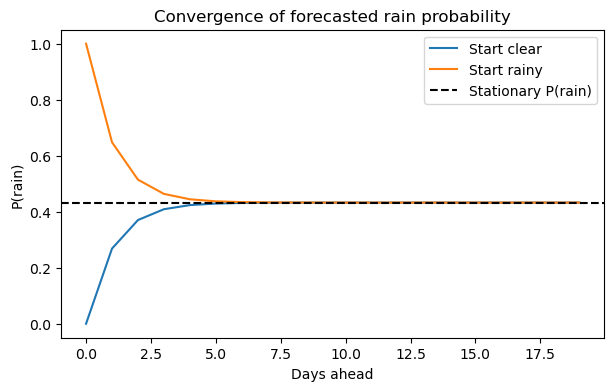

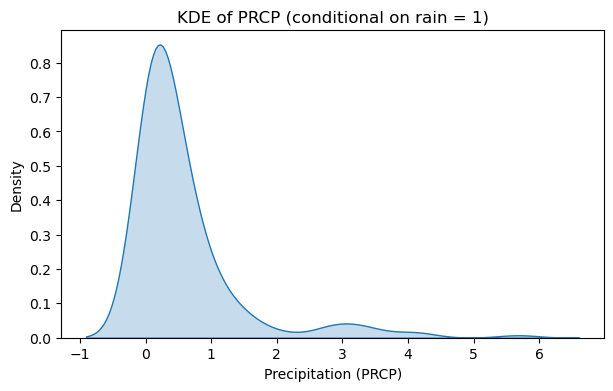

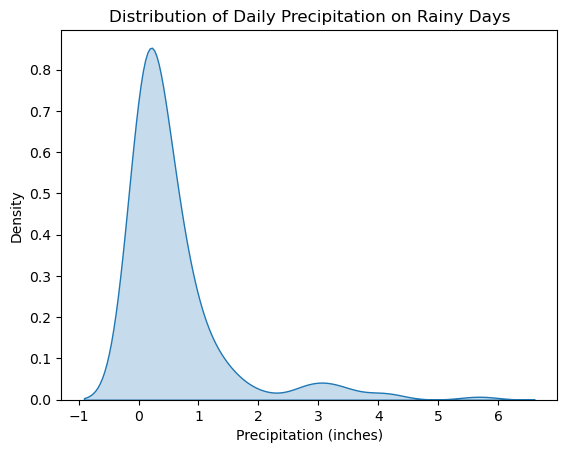

In [39]:
steps = 20
dist_clear = [p_clear @ np.linalg.matrix_power(P, i) for i in range(steps)]
dist_rainy = [p_rainy @ np.linalg.matrix_power(P, i) for i in range(steps)]

plt.figure(figsize=(7,4))
plt.plot(range(steps), [d[0,1] for d in dist_clear], label="Start clear")
plt.plot(range(steps), [d[0,1] for d in dist_rainy], label="Start rainy")
plt.axhline(clear_dist[0,1], color="black", linestyle="--", label="Stationary P(rain)")
plt.xlabel("Days ahead")
plt.ylabel("P(rain)")
plt.title("Convergence of forecasted rain probability")
plt.legend()
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(weather.loc[weather["rain"] == 1, "PRCP"], fill=True)
plt.title("KDE of PRCP (conditional on rain = 1)")
plt.xlabel("Precipitation (PRCP)")
plt.show()

sns.kdeplot(weather.loc[weather["rain"] == 1, "PRCP"], fill=True)
plt.title("Distribution of Daily Precipitation on Rainy Days")
plt.xlabel("Precipitation (inches)")
plt.ylabel("Density")
plt.show()

The KDE plot of PRCP on rainy days shows the distribution of rainfall intensities. Most rainy days have small to moderate precipitation, with a long right tail representing occasional heavy rain events. This non-normal, skewed distribution highlights why modeling rainfall amount separately from the binary rain/no-rain process is useful.

Possible model improvement:

Data quality summary:

Date range: 2024-01-04 00:00:00 to 2025-09-28 00:00:00

Total days: 634

Days with data: 411

Missing days: 317

Data coverage: 64.8%

Warning: Missing dates may affect Markov chain accuracy

Starting from either a clear or rainy day, the model converges to the same long-run distribution (~57% clear, 43% rainy). This demonstrates that the Markov chain’s stationary state is independent of initial conditions.

A more accurate model could consider multi-day dependencies a higher-order Markov chain or seasonal effects, since rain likelihood often varies by month.

One improvement would be to include seasonal effects or multi-day dependencies. For example, the chance of rain often depends on the time of year or the number of consecutive rainy days, so a higher-order Markov chain or inclusion of month indicators could improve forecasting accuracy.

The two-state Markov chain effectively models the daily transition between clear and rainy weather. The transition probabilities show moderate persistence in rainy days. The long-run stationary distribution converges to approximately 57% clear and 43% rainy days, independent of starting condition. A KDE of precipitation amounts reveals a highly skewed distribution, with most rainfall days being light and a few intense outliers. To improve this model, one could add seasonal patterns, account for temperature, or use higher-order transitions that consider rainfall persistence over multiple days.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

In [13]:
with open('taxicab.pkl', 'rb')as f:
    data = pickle.load(f)
len(data)

1000

In [14]:
states = set(data[0])

for i in range(1, len(data)):
    new_trip = data[i]
    new_states = set(new_trip)
    states = states.union(new_states)
states = list(states)

In [15]:
tr_counts = np.zeros((len(states), len(states)))

for trip in data:
    seq = np.array(trip)
    for t in range(1, len(seq)):
        x_tm1 = seq[t-1]
        x_t = seq[t]
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        tr_counts[index_to, index_from] += 1

In [16]:
sums = tr_counts.sum(axis = 0, keepdims = True)
print('State proportions: \n')
print(sums)

State proportions: 

[[2.171460e+05 1.803502e+06 5.017520e+05 6.544000e+05 5.505930e+05
  2.292350e+05 3.705730e+05 3.851989e+06 2.363902e+06 1.978286e+06
  3.952900e+05 1.112820e+05 8.740570e+05 1.000000e+00 8.393600e+05
  3.603000e+03 1.431100e+04 5.102590e+05 7.252200e+04 1.058700e+05
  1.063810e+05 5.791000e+04 8.010000e+03 4.415730e+05 3.000000e+00
  1.627100e+05 1.038800e+04 4.086350e+05 8.886410e+05 5.077810e+05
  4.930000e+02 1.200000e+01 3.168450e+05 3.701250e+05 3.859100e+04
  1.224335e+06 1.743200e+05 2.797710e+06]]


In [17]:
tr_pr = np.divide(tr_counts, sums,
                  out = np.zeros_like(tr_counts),
                  where = sums != 0)
print('Transition Proportions: \n')
tr_df = pd.DataFrame(np.round(tr_pr,2), index = states, columns = states)
print(tr_df)

Transition Proportions: 

                     Harlem  Upper West Side  Gramercy  Murray Hill  SoHo  \
Harlem                 0.21             0.02      0.00         0.00  0.00   
Upper West Side        0.21             0.42      0.02         0.02  0.02   
Gramercy               0.00             0.00      0.18         0.03  0.02   
Murray Hill            0.01             0.01      0.05         0.20  0.02   
SoHo                   0.00             0.00      0.02         0.01  0.25   
Battery Park City      0.00             0.00      0.01         0.00  0.02   
Lower East Side        0.00             0.00      0.02         0.01  0.02   
Midtown                0.07             0.12      0.13         0.26  0.08   
Outside Manhattan      0.06             0.04      0.05         0.06  0.07   
Chelsea                0.03             0.04      0.10         0.06  0.09   
Flatiron District      0.00             0.00      0.03         0.02  0.02   
Stuyvesant Town        0.00             0.00      

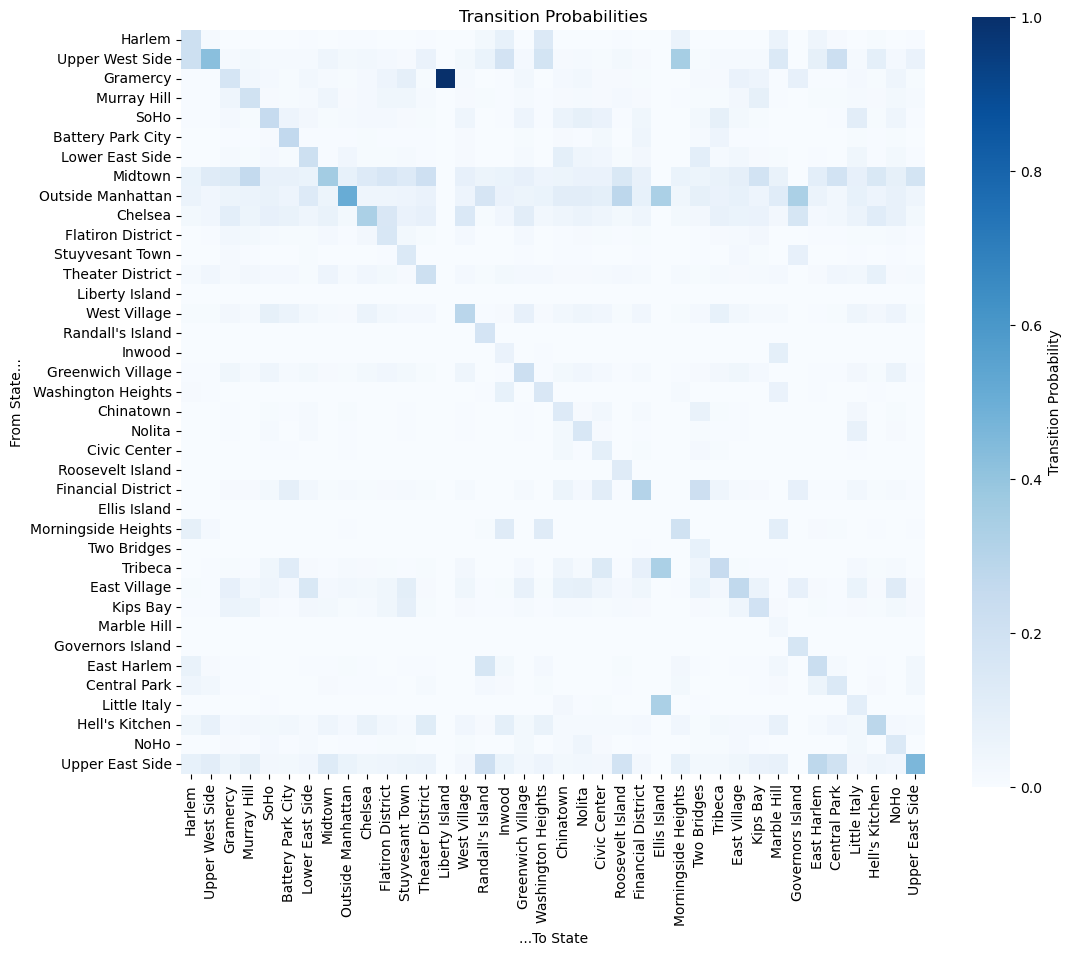

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(tr_pr,
            cmap='Blues',
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

The most common routes are represented by the darkest blue squares. For example, between Midtown, Chelsea, and the Upper West Side.

Taxicab movements are most likely order 1 because the next location depends mainly on where the cab is currently located, not where it came from. Once a cab drops off a passenger, its next trip is determined by present factors like nearby demand and traffic conditions. Knowing the previous stop adds little predictive value once the current location is known. Therefore, taxicab trajectories satisfy the Markov property, where the current state fully determines the probability of the next state.

In [27]:
# make sure columns are "from" states, rows are "to" states
P = tr_pr.copy()
states = list(tr_df.columns)

# pick start
start_state = "Hell's Kitchen"
if start_state not in states:
    # handle small naming difference if necessary
    start_state = [s for s in states if "Hell" in s or "Kitchen" in s][0]

# start as a one-hot vector (prob 1 at Hell’s Kitchen)
v0 = np.zeros(len(states))
v0[states.index(start_state)] = 1

def forecast(v, P, steps):
    """Return distribution after k steps."""
    M = np.linalg.matrix_power(P, steps)
    vk = M @ v
    return pd.Series(vk, index=states).sort_values(ascending=False)

for k in [2, 3, 5, 10]:
    fk = forecast(v0, P, k)
    print(f"\nTop 10 neighborhoods after {k} trips starting from {start_state}:")
    print(fk.head(10).round(3))


Top 10 neighborhoods after 2 trips starting from Hell's Kitchen:
Midtown              0.173
Hell's Kitchen       0.119
Chelsea              0.109
Upper West Side      0.099
Upper East Side      0.087
Outside Manhattan    0.078
Theater District     0.060
West Village         0.035
East Village         0.025
Murray Hill          0.023
dtype: float64

Top 10 neighborhoods after 3 trips starting from Hell's Kitchen:
Midtown              0.173
Upper East Side      0.108
Chelsea              0.097
Upper West Side      0.092
Outside Manhattan    0.090
Hell's Kitchen       0.075
Theater District     0.047
West Village         0.036
East Village         0.032
Murray Hill          0.026
dtype: float64

Top 10 neighborhoods after 5 trips starting from Hell's Kitchen:
Midtown              0.169
Upper East Side      0.120
Outside Manhattan    0.099
Chelsea              0.088
Upper West Side      0.083
Hell's Kitchen       0.057
Theater District     0.040
East Village         0.037
West Village    

In [20]:
# start from a uniform distribution (equal chance everywhere)
v = np.ones(len(states)) / len(states)

# power-method iteration
for i in range(1000):
    v_next = P @ v
    if np.max(np.abs(v_next - v)) < 1e-10:
        break
    v = v_next

stationary = pd.Series(v, index=states).sort_values(ascending=False)
print("\nLong-run (stationary) distribution — where cabs spend most time in Manhattan:")
print(stationary.head(15).round(3))


Long-run (stationary) distribution — where cabs spend most time in Manhattan:
Midtown               0.168
Upper East Side       0.122
Outside Manhattan     0.103
Chelsea               0.086
Upper West Side       0.079
Hell's Kitchen        0.053
East Village          0.039
Theater District      0.038
West Village          0.037
Murray Hill           0.028
SoHo                  0.024
Greenwich Village     0.022
Kips Bay              0.022
Gramercy              0.022
Financial District    0.019
dtype: float64
